In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Next try

In [ ]:
# Import basic
import numpy as np
import cv2
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# Now load all images and store them in array
from os import listdir
from PIL import Image
from numpy import asarray
from os.path import isdir
from numpy import savez_compressed
from numpy import load

# Make a function 
def extract_image(filename, required_size=(150, 150)):
  image = Image.open(filename)
  image = image.convert('RGB')
  array_img = asarray(image)
  image = Image.fromarray(array_img)
  image = image.resize(required_size)
  #norm = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  resized_array = asarray(image)
  return resized_array

# load images and resize for all images in a directory
def load_img_dir(directory):
 imgs = list()
 # enumerate files
 for filename in listdir(directory):
   path = directory + filename
   resized_img = extract_image(path)
   imgs.append(resized_img)
 return imgs

# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
	X, y = list(), list()
	# enumerate folders, on per class
	for subdir in listdir(directory):
		# path
		path = directory + subdir + '/'
		# skip any files that might be in the dir
		if not isdir(path):
			continue
		# load all faces in the subdirectory
		all_imgs = load_img_dir(path)
		# create labels
		labels = [subdir for _ in range(len(all_imgs))]
		# summarize progress
		print('>loaded %d examples for class: %s' % (len(all_imgs), subdir))
		# store into array
		X.extend(all_imgs)
		y.extend(labels)
	return asarray(X), asarray(y)

In [ ]:
# load train dataset
trainX, trainy = load_dataset('/content/drive/MyDrive/Training Images/AIP_image/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/content/drive/MyDrive/Training Images/AIP_image/test/')
# save arrays to one file in compressed format
savez_compressed('AIPcomplete_dataset2.3.npz', trainX, trainy, testX, testy)

>loaded 67 examples for class: duck
>loaded 82 examples for class: bear
>loaded 90 examples for class: camel
>loaded 111 examples for class: elephant
>loaded 92 examples for class: butterfly
>loaded 90 examples for class: chimp
(532, 150, 150, 3) (532,)
>loaded 20 examples for class: elephant
>loaded 20 examples for class: duck
>loaded 20 examples for class: chimp
>loaded 20 examples for class: camel
>loaded 20 examples for class: bear
>loaded 20 examples for class: butterfly


In [ ]:
# Load the dataset file
data = load('/content/AIPcomplete_dataset2.3.npz')

# Segment it into train and test along with thier label
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded train and test set: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded train and test set:  (532, 150, 150, 3) (532,) (120, 150, 150, 3) (120,)


In [ ]:
# Put numeric value for all classes to one hot encoding
trainy_features  = np.zeros((532,1))
for i in range(0, 532):
  if (trainy[i]=='duck'):
    trainy_features[i,:]= 0
  elif (trainy[i]=='bear'):
    trainy_features[i,:]= 1
  elif (trainy[i]=='camel'):
    trainy_features[i,:]=2
  elif (trainy[i]=='elephant'):
    trainy_features[i,:]=3
  elif (trainy[i]=='butterfly'):
    trainy_features[i,:]= 4
  elif (trainy[i]=='chimp'):
    trainy_features[i,:] = 5


In [ ]:
# Do same for test data
testy_features  = np.zeros((120,1))
for i in range(0, 120):
  if (testy[i]=='duck'):
    testy_features[i,:]= 0
  elif (testy[i]=='bear'):
    testy_features[i,:]= 1
  elif (testy[i]=='camel'):
    testy_features[i,:]=2
  elif (testy[i]=='elephant'):
    testy_features[i,:]=3
  elif (testy[i]=='butterfly'):
    testy_features[i,:]= 4
  elif (testy[i]=='chimp'):
    testy_features[i,:] = 5



In [ ]:
# Split the train data into train and validation part
#trainx, valx, trainy, valy = train_test_split(trainX, trainy_features, test_size=0.1, random_state=10)

In [ ]:
print('Training Dataset Shape: ­{}'.format(trainX.shape))
print('No. of Training Dataset Labels: {}'.format(len(trainy)))

Training Dataset Shape: ­(532, 150, 150, 3)
No. of Training Dataset Labels: 532


In [ ]:
# Normalize the input data
training_images= trainX/255.0
test_images=testX/255.0

In [ ]:
# Now do one hot encoding
trainy = to_categorical(trainy_features)
testy = to_categorical(testy_features)

[0. 0. 0. 0. 1. 0.]


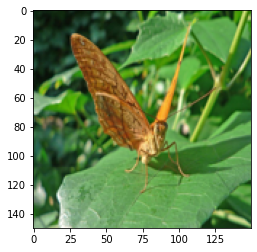

In [ ]:
# To ensure analyse some random data
import matplotlib.pyplot as plt
n  = np.random.randint(1, 478)
plt.imshow(training_images[n])
print(trainy[n])

Note: To build model I have used Tensorflow, because my familiarity with Tensorflow is more than Pytorch. We have to build model from scratch hence.

In [ ]:
# Now build the model
# Note 
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model = Sequential()
 
#add model layers

model = Sequential()
# #Layer 1
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150, 150, 3),strides=(1,1)))
model.add(MaxPooling2D((2,2)))
 
# #Layer 2
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))
# #Layer 3
 
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
# #Layer 4
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((3,3)))
model.add(Dropout(0.5))
model.add(MaxPooling2D((2,2)))

# #Input to Neural Network is flattened
model.add(Flatten())
# #1st hidden layer with 256 neurons/nodes
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 70, 70, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 35, 35, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 33, 33, 128)      

In [ ]:
 
"""## Compiling and Training the Neural Network"""
 
#Compile the neural network
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
 
#Train the network
model.fit(trainX, trainy, validation_data = (testX, testy), epochs=100, batch_size=64)

Epoch 1/100
9/9 [==============================] - 2s 102ms/step - loss: 6.7570 - accuracy: 0.1673 - val_loss: 1.7916 - val_accuracy: 0.1333
Epoch 2/100
9/9 [==============================] - 1s 73ms/step - loss: 1.7900 - accuracy: 0.1805 - val_loss: 1.7880 - val_accuracy: 0.2167
Epoch 3/100
9/9 [==============================] - 1s 74ms/step - loss: 1.7888 - accuracy: 0.1936 - val_loss: 1.7876 - val_accuracy: 0.2417
Epoch 4/100
9/9 [==============================] - 1s 73ms/step - loss: 1.7896 - accuracy: 0.1955 - val_loss: 1.7872 - val_accuracy: 0.2167
Epoch 5/100
9/9 [==============================] - 1s 73ms/step - loss: 1.7775 - accuracy: 0.1917 - val_loss: 1.7812 - val_accuracy: 0.2583
Epoch 6/100
9/9 [==============================] - 1s 74ms/step - loss: 1.7627 - accuracy: 0.2462 - val_loss: 1.7726 - val_accuracy: 0.2250
Epoch 7/100
9/9 [==============================] - 1s 73ms/step - loss: 1.7505 - accuracy: 0.2688 - val_loss: 1.7502 - val_accuracy: 0.2667
Epoch 8/100
9/9 [==

In [ ]:
model.save('model.h5')
print('model saved')

model saved


In [ ]:
# Inference the model
from keras.models import load_model
model = load_model("model.h5")
 
score = model.evaluate(testX, testy)
 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
 
#Predict output on sample input data
pred = model.predict(testX) 
pred = np.argmax(pred, axis = 1)[:20] 
label = np.argmax(testy,axis = 1)[:20] 
 
print("Predicted labels:",pred) 
print("Actual Labels:   ",label)

4/4 [==============================] - 0s 20ms/step - loss: 1.8462 - accuracy: 0.4500
Test loss: 1.8461863994598389
Test accuracy: 0.44999998807907104
4/4 [==============================] - 0s 18ms/step
Predicted labels: [5 3 1 3 3 1 3 2 3 3 3 3 1 0 2 3 1 1 1 3]
Actual Labels:    [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


So, accuracy is around 45%